# Projet  4 : Analyse de vente

Ce notebook  est consacré  à l'anlyse proporement  dite  de  notre dataframe nettoyé dans  la mission 1 du  projet 4.Il s'appuiera sur des indiccateurs  precis  pour sortirr des  informations clés   issues d'une exploitation fine  des données   à notre dispsoition.

# Mission 2 : Analyses 

Cette  mission sera realisée en nous appuyant sur  les ressources diverses  d'openclassroom  et  autres  du langage  python et  ses  differentes  librairies dediées  à la data analyse.

In [1]:
import pandas as pd
import  numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st

In [2]:
#Chargeaons notre  table finale  apres  l'avoir   importé dans  jupyter notebook lors de  la  mission 1

datap4 = pd.read_csv('datap4')
datap4['date'] = pd.to_datetime(datap4['date'],infer_datetime_format = True,
                                              errors='coerce')
datap4.info()
datap4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  336713 non-null  int64         
 1   id_prod     336713 non-null  object        
 2   price       336713 non-null  float64       
 3   categ       336713 non-null  float64       
 4   date        336713 non-null  datetime64[ns]
 5   session_id  336713 non-null  object        
 6   client_id   336713 non-null  object        
 7   sex         336713 non-null  object        
 8   birth       336713 non-null  int64         
 9   datebis     336713 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 25.7+ MB


,Unnamed: 0,id_prod,price,categ,date,session_id,client_id,sex,birth,datebis
0,0,0_1483,4.99,0.0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2021-04-10 18:37:28.723910
1,1,0_1483,4.99,0.0,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,2021-12-27 11:11:12.123067
2,2,0_1483,4.99,0.0,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,2021-10-27 04:56:38.293970
3,3,0_1483,4.99,0.0,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,2021-07-04 06:43:45.676567
4,4,0_1483,4.99,0.0,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,2021-09-19 08:45:43.735331


In [3]:
#Supprimons  la colonne datebis dont  on a  plus besoin 
datap4V = datap4.drop(columns = ['datebis'])
datap4V.head()

,Unnamed: 0,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0,0_1483,4.99,0.0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,1,0_1483,4.99,0.0,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981
2,2,0_1483,4.99,0.0,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985
3,3,0_1483,4.99,0.0,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989
4,4,0_1483,4.99,0.0,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980


In [4]:
#Explorons notre table avant  les analyses
# avec la methhode describe  
datap4V.describe(include ='all')

<ipython-input-4-598fff63d957>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  datap4V.describe(include ='all')


,Unnamed: 0,id_prod,price,categ,date,session_id,client_id,sex,birth
count,336713.000000,336713,336713.000000,336713.000000,336713,336713,336713,336713,336713.000000
unique,NaN,3264,NaN,NaN,336713,169173,8600,2,NaN
top,NaN,1_369,NaN,NaN,2021-06-30 11:35:55.387896,s_118668,c_1609,m,NaN
freq,NaN,1081,NaN,NaN,1,14,12855,169198,NaN
first,NaN,NaN,NaN,NaN,2021-03-01 00:01:07.843138,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2022-02-28 23:59:58.040472,NaN,NaN,NaN,NaN
mean,168449.615756,NaN,17.215189,0.430156,NaN,NaN,NaN,NaN,1977.823568
std,97217.147271,NaN,17.855445,0.591082,NaN,NaN,NaN,NaN,13.524433
min,0.000000,NaN,0.620000,0.000000,NaN,NaN,NaN,NaN,1929.000000
25%,84281.000000,NaN,8.610000,0.000000,NaN,NaN,NaN,NaN,1971.000000


In [5]:
#Coninuons d'explorer  notre  table  
#En verifiant pr exemple s'il y' a  pas des doublons  
datap4V.duplicated().sum()

0

# Indicateurs et indices statistiques

Nous allons commencer  nos analyses en debutant  avec  les analyse  univariées.
Nous allons proceder en choisissant des variables de  notre DF  et  appliquer des analyses diverses.Ces analyses sont  :
-les mesures de tendence centrale
-les mesures de dispersion 
-les mesures de  forme
-les  mesures de concentration
Aussi  verrons- nous  les  analyse  bivariées 
Tous ces elements  font  partie  de  la statitistique descriptive 

# Variable price

In [6]:
#Les 3 M : mode  , moyenne  , mediane
#Testons  ces indicateurs sur la variable  price  
#Calcul du mode
#Cet indicateur nous informe  sur  le  prix  qui revient  le  plus dans  notre  jeu de donnée
datap4V['price'].mode()

0    15.99
dtype: float64

In [7]:
#Calculer  des elements en une fois avvec  print  de  la variable  price
print("Moyenne : ", datap4V["price"].mean(), " ; Mediane : ", datap4V['price'].median(), " ; Mode : ", datap4V['price'].mode())

Moyenne :  17.21518851371992  ; Mediane :  13.9  ; Mode :  0    15.99
dtype: float64


In [8]:
#Interpretons ces  mesures de  tendnce  centrale
#En moyenne  les  prix  des  porduits achétés (livres) tournent auour de  17 €
# les  produits  dont  les  prix tournent autour de  16 € sont  ceux qui sont  les  plus achétés
#Sachant que  le produit  ici  est un  livre cela fait sens.


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'categ'}>,
        <AxesSubplot:title={'center':'birth'}>]], dtype=object)

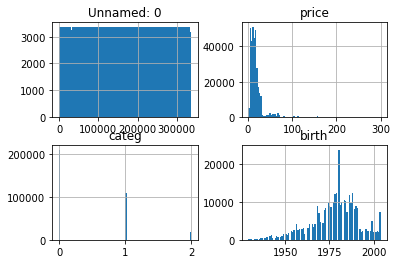

In [10]:
#Affichons  cette distribution  aussi  avec  un  histogramme  
#dans  le  but de mieux visualiser
datap4V.hist(bins = 100)

<AxesSubplot:>

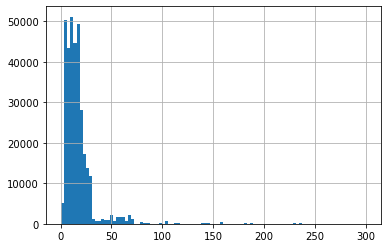

In [11]:
#Representons graphiquement  une des variables de  notre  table en  histogramme
datap4V['price'].hist(bins =100)

# variable birth

In [12]:
#Appliquons  les troix  mesures de  tendance centrale  sur cette varible quantitative  
''
print('Moyenne :', datap4V['birth'].mean(),';Mediane :' , datap4V['birth'].median(),' ; Mode : ',datap4V['birth'].mode())

Moyenne : 1977.8235678456133 ;Mediane : 1980.0  ; Mode :  0    1980
dtype: int64


# Variable categ

In [13]:
#Calculons les differentes  mesures de tendance centrale  avec  les 3M

print("Moyenne : ", datap4V["categ"].mean(), " ; Mediane : ", datap4V['categ'].median(), " ; Mode : ", datap4V['categ'].mode())


#la  mediane ne donne  pas d'information interessante de  lecture de  sa distribution 


Moyenne :  0.4301556518459341  ; Mediane :  0.0  ; Mode :  0    0.0
dtype: float64


<AxesSubplot:>

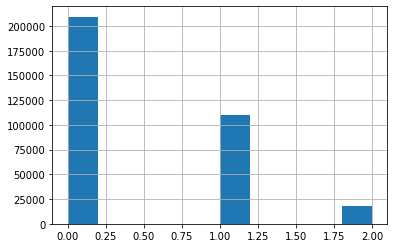

In [14]:
#Affichons  l'histogramme de cette varible 
datap4V['categ'].hist()
#

<AxesSubplot:>

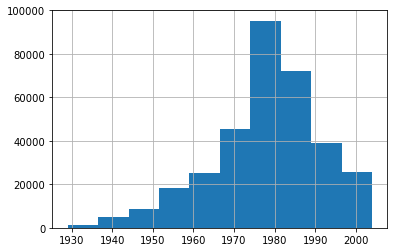

In [15]:
#Affichons des histogrammes  
datap4V['birth'].hist()

# Mesures de dispersion

In [74]:
#Repreesentées  par  la variance  , l'eacrat-type  ,  (ecart-type  emprique et  interquartile)
#Calculons  la variance  ou l'ecart-type  d'une des variables  
datap4V['birth'].std()
#

13.524433308700566

In [18]:
#Calculons  la variance de  la  variable price
datap4V['price'].std()
# selon le  prix  moyen  de 15  , on a ecart  de 17 

17.855445377654338

# Mesures de forme

In [75]:
#Elles sont constituées de  skewness,  kurtosis  
#Calculons  le skewness 
datap4V['price'].skew()
#cette mesure  montre   les formes symetriques d'une distribution 

5.479196379351584

In [76]:
#Calculons  le  kurtosis empirique  
datap4V['price'].kurtosis()
#Il  est tres haut  parce qu'on est tres resseré autour de quelques valeurs  


45.42520484470874

# Analyse bivariée


Elle sert  à mettre en evidence  des relations entre deux variables  pour  en sortir  des elements pouvant  nous conduire  à  faire deschoix  ou  à prendre des decisions  . 
On  peut aussi a travers cette analyse crée  un algorithme  permettant  de faire des actions  selon  une demande  precise.
Elle sert à etudier  les relations entre variables  d'une distribution donnée 
# #on  parle de correlation  entre deux variables  . cela veut dire  qu'avec  une variable  on  peut avoir des  informations sur  l'autre  
le diagramme de dispersion est utilise  pour representer  les relations entre duux variables quantitatives alors que  le tableau de contingence repreesente  les correlations entre variables qualitatives .
Pour  mener  notre exercice  , nous allons  proceder  par couple  de variable

# Couple 1 [naissance-prix]

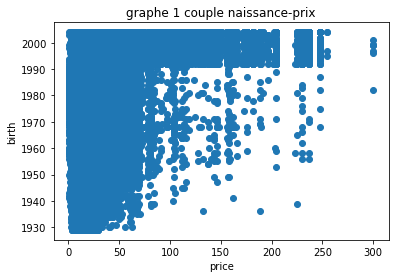

In [77]:
#Essayons de representer   par  un diagramme de  dispersion les deux variables quntitatives 
#Price et  birth 

plt.plot(datap4V['price'],datap4V['birth'],'o',alpha=2.0)
plt.title('graphe 1 couple naissance-prix')
plt.xlabel('price')
plt.ylabel('birth')
plt.show()

# Interpretation  du graphe 
# Les deux variables etudiees  ici  representent  le  prix des  produits et l'age des clients  ayant acheté ces  produits
#Nous aimerions savoir  si  l'age des clients  peut  influencer  sur  le  montant  d'achat  des  produits  
#Ou  est  ce que selon  que  les  prix des  produits sont  plus cheres  (ou plus  petit) ,les clients  d'une telle classe 
#d'age  achete  plus  ou moins ? 
##Ou est ce qu'il existe  une correlation entre  l'age et le montant total des achats 
#On constate une forme  particuliiere  de dispersion sur ce graphe
# A travers ce  graphe 1 , on observe que  les  produits se situant   dans la classe de  prix  de  0  à  30 €
# sont  achétes par  tous les ages 
# On constate  une forte condensation des  points  autour  de la classe de  prix  de o à 30 €
#Ensuite  les  points sont disperses et  de  moins en  moins au  fur qu'on avance  vers  le  prix de  300
#1Cela peut etre comprehensible car  le  priduit ici  est  un  livre  
#On  pourrait dire quelques soient  l'age  le  montant total depasse rarement les 30 €
#On remarque etonnement  que   les jeunes achetent  plus  des  produits  pluus chèrs 
#Nous  pourrons dire  qu'il n'ya certainement  pas de correlation entre  l'age et  l'achat  des  livres 


In [25]:
#Analyse sur des  variables quantitatives  possibilite de representer avec  un diagramme de dispersion - 
#Nous allons calculer  la correlation  potentielle entre les variabless  price et  birth
#On  peut calculer la covariance empririque et le coeeficient de correlation lineaire (r) ou  de  Pearson  
#Dans  notre  dataframe  , nous avons  3 variables quantitatives et le reste des variables qualitatives
#Nous allons realiser  une analyse bivarie enhtre deux varibles quantitatives  pour representer   un diagramme de dispersion
#Mais avant  importons les librairies qui permettent ces calculs notamment scipy 
#Ensuite   nous calculons  r avec  les deux  variables recquises et selections  le  premier resultats de cet ensemble 

print(st.pearsonr(datap4V['price'], datap4V['birth'])[0])



0.21152926170472086


In [26]:

#Interpretation 
# A travers lle graphe 1 ; les  points ne sont  pas  alignés de sorte  à  former  une forme lineaire
#Ainsi  il est impossible   de deceler  une correlation  lineaire  
#La valeur du coefficient de correlation lineaire  n'est pas ainsi  proche  ni de   -1 et  , ni de 1

In [27]:
#Calculons la matrice de covariance  
print(np.cov(datap4V['price'], datap4V['birth'] ,ddof=0)[1,0])

51.08094556500938


# Couple 2 [prix-categorie]

In [28]:

#Calculons   pour  les variables quantitatives  de prix et  de  categorie
#Calcul  du  coefficient  de covariance lineaire
print(st.pearsonr(datap4V['price'], datap4V['categ'])[0])

0.673359134019579


In [29]:
#Maintenant  calculons la matrice de covariance
print(np.cov(datap4V['price'], datap4V['categ'] ,ddof=0)[1,0])

7.106631287981137


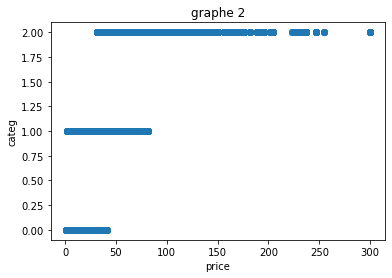

In [30]:
#Visualisons  les  representations  de ce  couple  

plt.plot(datap4V['price'], datap4V['categ'],'o', alpha =2.0)
plt.title('graphe 2')
plt.xlabel('price')
plt.ylabel('categ')
plt.show()

In [31]:
##Interpretation 
#Sur ce graphe  il y a pas  d'informations nouvelles revelées à travers  l'analyse bivariée
#Nous observvons une distribition qui revele  que les  produits de categorie 2 sont  les  plus  coutants 
#Nous ne voyons aucune correlation entre  les prix des produits  et la categorie  
#Pour dire qu'on ne peut  pa etablir  une relation entre un  produit  d'une  quelconcque categorie  et  son  prix de vente
#Il nous est imossible de repondre s'il  y a relation entre  le  montoant de  notre  produit  et  la categorie dans laquelle  il est  



# Couple 3 [sexe-categorie]

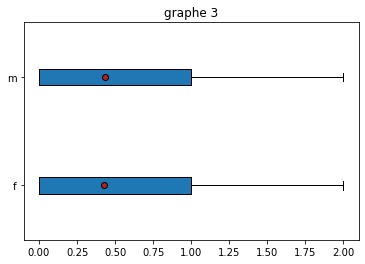

In [32]:
#Visualisons  
#Pour  illustrer  ce couple  nous alons en  premier  creer  un sous-echantillon
X= 'sex'
Y= 'categ'
sous_echantillon = datap4V.copy()
modalites= sous_echantillon[X].unique()
groupes =[]
for m in modalites:
     groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
        
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('graphe 3')
plt.show()

In [33]:
#Cette representation  n'indique rien de  notable  pour  notre analyse  
#Ce graphe est  atypique car nous  n'observons  pas  la  mediane  à l'interieur de  la  boite  
#Par contre  nous  y  observons  les  moyennes  marquées en  rouge  
#de ce fait  il est  difficile  de visualiser  l'etendue de  la serie statistique  
#Les  formes sont  indentiques  d'un genre  à lun autre  dans  les deux  boites  
#


# Couple sex-price

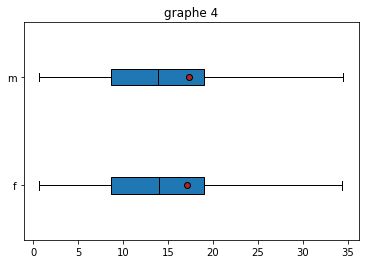

In [34]:
#Pour  illustrer  ce couple  nous alons en  premier  creer  un sous-echantillon
X= 'sex'
Y= 'price'
sous_echantillon = datap4V.copy()
modalites= sous_echantillon[X].unique()
groupes =[]
for m in modalites:
     groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
        
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('graphe 4')
plt.show()

In [35]:
#Interpretation
#Sur le graphe  on constate  que les  moyennes se situent  au meme niveau  dans  les deux genres de sesxe
#Nous  observons aussi  que  les  montants des  produits sont equivalents qu'on soit du sexe M ou F
#Nous observon  la meme valeur de  l'ecart  interquartile  dans  les deux  boites  
#On constate aussi la meme  forme de dispersion  identitque dans  les deux cas  
#


In [36]:
#Calculons  le rapport de  correlation a travers eta carré
X = 'sex'
Y = 'price'
sous_echantillon = datap4V.copy()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])


6.740934192042128e-05

In [37]:
#Interpretation du  test d'eta carré  
#  ce  resultats  tres eproche de  O ,  on  peut dire qu'il y ' pas de correlation  entre les deux varibles  
#'C'est la meme  observation que  nous avons faites sur  le  graphique  
#Il y a donc  independnce des deux valeurs  
#

# Coreelation age-Montant d'achat

In [39]:
#Trouvons  le  nombre total d'achat  fait par client  
#Nous allons d'abord  regroupé par client  
#Ensuite  nous allons sommer  l'ensemble  de ce regroupement 
#Pour cela  nous allons creer  un df qui reponds a notre  besoin  
#Nous allons creer  un DF  client sans   la variable  birth
#Mais affichons d'abord  les colonnes afin de  les recuperer 
datap4V.columns.unique()


Index(['Unnamed: 0', 'id_prod', 'price', 'categ', 'date', 'session_id',
       'client_id', 'sex', 'birth'],
      dtype='object')

In [73]:
#A travers  une  restriction   modifions  notre  DF cient  
dfclient = datap4V[['Unnamed: 0', 'id_prod', 'price', 'categ','client_id']]
dfclient.head()

,Unnamed: 0,id_prod,price,categ,client_id
0,0,0_1483,4.99,0.0,c_4450
1,1,0_1483,4.99,0.0,c_5433
2,2,0_1483,4.99,0.0,c_857
3,3,0_1483,4.99,0.0,c_3679
4,4,0_1483,4.99,0.0,c_1609


In [41]:
#Avec cette  nouvelle df  client  je vais  grouper sur client id  
dfclient_gr  = dfclient.groupby(by = 'client_id').sum()
dfclient_gr.head()

,Unnamed: 0,price,categ
client_id,,,
c_1,3658354,300.65,6.0
c_10,4673900,586.18,19.0
c_100,1092567,222.87,5.0
c_1000,7798099,980.02,36.0
c_1001,10308132,1102.45,16.0


In [42]:
#ce  nouveau  Df  contient  le  montant  par client  mais sans  les ages  
#Nous allons  pour repondre a  la question  faire  une  jointure  
#la jointure  se fera sur  une clé commune de  client_id en  faisant  une  inner joint
#Mais avant  affichons  l'autre  table de client  obtenu  dans  la  mission 1  
df_client = pd.read_csv('customers.csv')
df_client.info()
df_client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [43]:
#Nous allons  joindre ces deux tables à partir de  la clé commune client_id  
dfclient_jn = pd.merge(dfclient_gr,df_client ,on = 'client_id' ,how = 'inner')
dfclient_jn.head()

,client_id,Unnamed: 0,price,categ,sex,birth
0,c_1,3658354,300.65,6.0,m,1955
1,c_10,4673900,586.18,19.0,m,1956
2,c_100,1092567,222.87,5.0,m,1992
3,c_1000,7798099,980.02,36.0,f,1966
4,c_1001,10308132,1102.45,16.0,m,1982


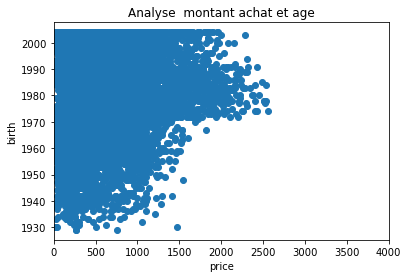

In [80]:
#Avec  cette  nouvelle  table  , nous allons  trouver  des mesures de disprsion 
#Essayons d'abord de representer  par  un diagramme de dispersion les deux varibles quantitatives  

plt.plot(dfclient_jn['price'],dfclient_jn['birth'],'o',alpha=2.0)
plt.title('Analyse  montant achat et age')
plt.xlabel('price')
plt.ylabel('birth')
plt.xlim([0,4000])
plt.show()

In [45]:
#Nous allons calculer  le coefficient  de  correlation  lineaire  
#Ce calcul  en  plus de  la  representation graphique vont  nous  permettre  de  mieux  interpreter  l'analyse bivariée
print(st.pearsonr(dfclient_jn['price'], dfclient_jn['birth'])[0])

0.0393109914577625


# Interpretattion 
Nous cherchons a savoir si  selon  l'age  du  client  , s'il peut exister  une relation  entre l'age et  le  montant de ses acahts  .
En d'autres  mots est ce que  l'age  peut  influencer sur  la  propension aux achats  du  client ?  
Si nous  nous referons  au coefficient  de  correlation lineaire  r est  proche de  0  donc  pas de correlation  lineaire entre ces deux varibles.
En  outre  sur  le graphe  nous  observons une forte concentration de valeurs  au  niveau de la valeur  minimale 0 et  quelques valeurs dispsersés .
Par contre  on  observe  que  les jeunes  ont  une  propension a depenser  un  peu plus  que  les  moins  jeunes  


# Correlation age  -frequence d'achat


In [46]:
#Pour repondre à  cette question nous allons d'abord  recharger  la table qui contients  les elements recquis
#Nous allons ajouter a notre DF client  les elements de  la table d'origine qui nous interesse
#ces elemnts sont  la variablle date et  celle des sessions id  
#Nous allons  nous appuyer sur  la table des clients grouppée 
#Nous allons  grouppés ensuite la table transaction  par  session 
#Et enfin fusionner  les deux tables  
dfsession = datap4V.groupby(by = 'session_id').sum()
dfsession.head()


,Unnamed: 0,price,categ,birth
session_id,,,,
s_1,240516,11.99,0.0,1967
s_10,245193,26.99,1.0,1970
s_100,366588,33.72,0.0,3956
s_1000,259837,39.22,0.0,7956
s_10000,293542,41.49,1.0,5967


In [47]:
#Nous allons supprimer  la colonne  de  unnamed  qui  ne nousn sert pas  
dfsessionV = dfsession.drop(columns ='Unnamed: 0')
dfsessionV.head()

,price,categ,birth
session_id,,,
s_1,11.99,0.0,1967
s_10,26.99,1.0,1970
s_100,33.72,0.0,3956
s_1000,39.22,0.0,7956
s_10000,41.49,1.0,5967


In [48]:
#Essayons d'avoir  plus d'infos sur cette  nouvelle DF
dfsessionV.info()
dfsessionV.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 169173 entries, s_1 to s_99998
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   169173 non-null  float64
 1   categ   169173 non-null  float64
 2   birth   169173 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 5.2+ MB


,price,categ,birth
count,169173.000000,169173.000000,169173.000000
mean,34.264202,0.856159,3936.555520
std,31.872538,0.980733,2524.573036
min,0.620000,0.000000,1929.000000
25%,15.200000,0.000000,1971.000000
50%,25.560000,1.000000,3918.000000
75%,42.980000,1.000000,5898.000000
max,539.230000,10.000000,27888.000000


In [49]:
#Maintenant  que  nous avons  grouppé  autour de session  nous allons  y ajouter   les dates 
#Nous allons atravers  une  jointure interne lier  les deux tables  
dfsession_jn = pd.merge(dfsessionV,datap4V ,on='session_id' ,how = 'inner')
dfsession_jn.head()


,session_id,price_x,categ_x,birth_x,Unnamed: 0,id_prod,price_y,categ_y,date,client_id,sex,birth_y
0,s_1,11.99,0.0,1967,240516,0_1259,11.99,0.0,2021-03-01 00:01:07.843138,c_329,f,1967
1,s_10,26.99,1.0,1970,245193,1_635,26.99,1.0,2021-03-01 00:10:33.163037,c_2218,f,1970
2,s_100,33.72,0.0,3956,175746,0_1451,19.99,0.0,2021-03-01 04:43:58.025677,c_3854,f,1978
3,s_100,33.72,0.0,3956,190842,0_1030,13.73,0.0,2021-03-01 04:12:43.572994,c_3854,f,1978
4,s_1000,39.22,0.0,7956,27324,0_1590,18.93,0.0,2021-03-03 02:49:03.169115,c_1014,m,1989


In [51]:
#Pour traiter  cette question  , nous allons selectionner  les coonnes qui nous  interessent  
#A partir d'un nouveau  Df  nous allon faire  les operations idoines  

dffreq = datap4V[['session_id','client_id','price','birth','date']]
dffreq.head()

,session_id,client_id,price,birth,date
0,s_18746,c_4450,4.99,1977,2021-04-10 18:37:28.723910
1,s_140787,c_5433,4.99,1981,2021-12-27 11:11:12.123067
2,s_110736,c_857,4.99,1985,2021-10-27 04:56:38.293970
3,s_57626,c_3679,4.99,1989,2021-07-04 06:43:45.676567
4,s_92165,c_1609,4.99,1980,2021-09-19 08:45:43.735331


In [52]:
#Nous allons agreger  cette DF sur  la variable session_id
dffreqgr = dffreq.groupby(["client_id","session_id"])["price"].sum()
dffreqgr.head()

client_id  session_id
c_1        s_105105       7.99
           s_114737      92.62
           s_120172      44.29
           s_134971      10.30
           s_136532      13.78
Name: price, dtype: float64

In [53]:
#Verifions que la session id ne comporte  pas des doublons  
#Mais avant  explorons  la table
dffreq.info()
dffreq.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  336713 non-null  object        
 1   client_id   336713 non-null  object        
 2   price       336713 non-null  float64       
 3   birth       336713 non-null  int64         
 4   date        336713 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.8+ MB


,price,birth
count,336713.000000,336713.000000
mean,17.215189,1977.823568
std,17.855445,13.524433
min,0.620000,1929.000000
25%,8.610000,1971.000000
50%,13.900000,1980.000000
75%,18.990000,1987.000000
max,300.000000,2004.000000


In [81]:
#Nous allons verifier  si  il  ya pas de doublons  à partir de  la table d'origine  
#Pour cela nous faisons  un test  sur  une session d'un client  le c1
#Dans  le test  , nous sommons  à la main  la colonne  price  et  trouvons qu'il equivaut  à 92,67 , le  numero  de  la session test

sestest = datap4V[(datap4V['session_id'] == 's_114737')]
sestest.head()

,Unnamed: 0,id_prod,price,categ,date,session_id,client_id,sex,birth
52025,52128,0_1410,14.85,0.0,2021-11-04 18:13:43.694570,s_114737,c_1,m,1955
110119,110222,0_1568,4.00,0.0,2021-11-04 18:02:39.561078,s_114737,c_1,m,1955
231407,231510,0_1747,3.99,0.0,2021-11-04 18:37:48.745436,s_114737,c_1,m,1955
295371,295474,0_1880,14.91,0.0,2021-11-04 18:37:01.482109,s_114737,c_1,m,1955
317762,317865,2_208,54.87,2.0,2021-11-04 17:28:13.934070,s_114737,c_1,m,1955


In [82]:
#Nous allons travailler avec  la table  dffreq  obtenue  plus haut   
#Nous allons garder  les colonnes qui nous interessent  en  enlevant  la colonne  prix  
dffreq.head()

,session_id,client_id,price,birth,date
0,s_18746,c_4450,4.99,1977,2021-04-10 18:37:28.723910
1,s_140787,c_5433,4.99,1981,2021-12-27 11:11:12.123067
2,s_110736,c_857,4.99,1985,2021-10-27 04:56:38.293970
3,s_57626,c_3679,4.99,1989,2021-07-04 06:43:45.676567
4,s_92165,c_1609,4.99,1980,2021-09-19 08:45:43.735331


In [58]:
#Faisons  une copie  de cette  noubelle table  afin de faire  les  operations dessus  
dffreqV= dffreq.copy()
#Nous allons  modifier  notre table en gardant que certaines colonnes  qui nous  interessent  
dffreqVR = dffreqV.drop(columns ='price')
dffreqVR.head()

,session_id,client_id,birth,date
0,s_18746,c_4450,1977,2021-04-10 18:37:28.723910
1,s_140787,c_5433,1981,2021-12-27 11:11:12.123067
2,s_110736,c_857,1985,2021-10-27 04:56:38.293970
3,s_57626,c_3679,1989,2021-07-04 06:43:45.676567
4,s_92165,c_1609,1980,2021-09-19 08:45:43.735331


In [59]:
#Nous faisons  une restriction des colonnes  pour garder que celles qui  nous  interessent
dfm3 = dffreq[['session_id','client_id','date']]
dfm3.head()

,session_id,client_id,date
0,s_18746,c_4450,2021-04-10 18:37:28.723910
1,s_140787,c_5433,2021-12-27 11:11:12.123067
2,s_110736,c_857,2021-10-27 04:56:38.293970
3,s_57626,c_3679,2021-07-04 06:43:45.676567
4,s_92165,c_1609,2021-09-19 08:45:43.735331


In [83]:
#Pour avoir  la  frequence  , nous allons  transformer  la colonne date  en  jour  ,  moi et  année
#Cela  nous  permettra de  pouvoir connaitre  les frequesnces selon des modalites  temporelles  
dfm3['annee'] =dfm3['date'].dt.year
dfm3['mois'] =dfm3['date'].dt.month
dfm3['jour'] =dfm3['date'].dt.day
dfm3.head()

,session_id,client_id,date,annee,mois,jour
0,s_18746,c_4450,2021-04-10 18:37:28.723910,2021,4,10
1,s_140787,c_5433,2021-12-27 11:11:12.123067,2021,12,27
2,s_110736,c_857,2021-10-27 04:56:38.293970,2021,10,27
3,s_57626,c_3679,2021-07-04 06:43:45.676567,2021,7,4
4,s_92165,c_1609,2021-09-19 08:45:43.735331,2021,9,19


In [84]:
#Nous allons travailler avec cette  nouvelle table  pour repondre à la quesion  
#Nous allons  faire  une agregation  par client  et  compter   le  nombre de client  
dfm3_gr = dfm3.groupby(by = 'client_id').agg(['count','sum'])
dfm3_gr.head()

session_id                                                    annee  \
               count                                                sum count   
client_id                                                                       
c_1               20  s_120172s_134971s_114737s_67467s_67769s_114737...    20   
c_10              28  s_77648s_120724s_65973s_65973s_17374s_131932s_...    28   
c_100              6         s_73929s_53051s_23060s_73929s_73929s_53051     6   
c_1000            56  s_6670s_48821s_75292s_157161s_161277s_111262s_...    56   
c_1001            58  s_141008s_69931s_122521s_106626s_141008s_24797...    58   

                   mois       jour       
              sum count  sum count  sum  
client_id                                
c_1         40421    20  185    20  272  
c_10        56588    28  217    28  414  
c_100       12126     6   40     6   98  
c_1000     113190    56  342    56  811  
c_1001     117227    58  444    58  921

In [85]:
#Agregeaons  comme  l'operation  precedente  
dfm3_gr = dfm3.groupby(['client_id','session_id'])['mois'].count()
dfm3_gr.head()

client_id  session_id
c_1        s_105105      1
           s_114737      5
           s_120172      2
           s_134971      1
           s_136532      1
Name: mois, dtype: int64

In [64]:
#Sur cette table  , je vais appliquer  une  moyenne  pour avoir  les naissances  telles qu'elles 
#Nous ne voulons  pas de nirth  sommer donc on fait  une nouvelle table  
#Nous allons creer  une table qui contient  les ages et  ensuite  faire  une fusion  avec  l'agregation  

dfnaiss =datap4V[['client_id' , 'birth']]
dfnaiss.head()

,client_id,birth
0,c_4450,1977
1,c_5433,1981
2,c_857,1985
3,c_3679,1989
4,c_1609,1980


In [87]:
#Je fais fusionner ces deux tables  pour avoir  un ligne comprenant les sessions et les naissances afin de repondre à la question  
dfm_freq  = pd.merge(dfm3_gr,dfnaiss ,on ='client_id' , how  = 'inner')
dfm_freq.head()

,client_id,mois,birth
0,c_1,1,1955
1,c_1,1,1955
2,c_1,1,1955
3,c_1,1,1955
4,c_1,1,1955


# Correlation age-panier moyen

In [66]:
#Nous cherchons ici  le  nombre d'article  qu'on a en  moyenne sur chaque session 
#Nous allons d'abord  creer  une copie  de  notre  table avant de faire  les  operations idoines  
#Nous comptons 

dfpanier = datap4V.groupby(by = 'session_id').agg(["mean", "count", "sum"])

dfpanier.head()


Unnamed: 0                 price                  categ        \
                     mean count     sum    mean count    sum      mean count   
session_id                                                                     
s_1         240516.000000     1  240516  11.990     1  11.99  0.000000     1   
s_10        245193.000000     1  245193  26.990     1  26.99  1.000000     1   
s_100       183294.000000     2  366588  16.860     2  33.72  0.000000     2   
s_1000       64959.250000     4  259837   9.805     4  39.22  0.000000     4   
s_10000      97847.333333     3  293542  13.830     3  41.49  0.333333     3   

                birth              
            sum  mean count   sum  
session_id                         
s_1         0.0  1967     1  1967  
s_10        1.0  1970     1  1970  
s_100       0.0  1978     2  3956  
s_1000      0.0  1989     4  7956  
s_10000     1.0  1989     3  5967

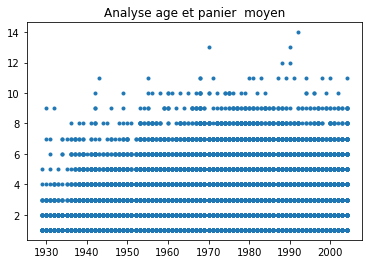

In [88]:
plt.plot(dfpanier["birth"]["mean"], dfpanier["price"]["count"], ".",)
plt.title('Analyse age et panier  moyen')
plt.show()

In [68]:
#Calculons   les indicateurs  
#Calculons  le coefficient  de  pearson  r
print(st.pearsonr(dfpanier["birth"]["mean"], dfpanier["price"]["count"])[0])

0.17761095911098457


# Intefpretation
Nous nous sommes pose  la question de savoir s'il existait des relations entre les deux  variables  age et  le  prix des articles  ;
Nous cherchons a savoir  si  selon  l'age , s'il est possible  d'avoir  une tendance  du panier  moyen  des clients
Nous aimerions savoir  si  selon  leurs ages  , si les clients  ont  tendance  à acheter  plus d'articles  ou  pas  
Ou reformulons  : "sachant que  vous avez  tel age est  ce que  vous etes  plus enclins  à  acheter  des  livres  environnant  un tel montant  ?  "
l'indicateur calcule ici de r  est proche de  0  , cela  peut dire que connaitre  la valeur de  la variable naisssance ne peut  pas  nous  aiguiller sur  la valeur de  la variable  prix 
Ainsi , nous  pouvons dire qu'il n'exuste  pas de correlation  lineaire entre  ces deux varibles.

In [70]:
#Supprimons  la colonne qui ne nous sert  pas  
dfpanierV = dfpanier.drop(columns ='Unnamed: 0')
dfpanierV.head()

price                  categ            birth            
              mean count    sum      mean count  sum  mean count   sum
session_id                                                            
s_1         11.990     1  11.99  0.000000     1  0.0  1967     1  1967
s_10        26.990     1  26.99  1.000000     1  1.0  1970     1  1970
s_100       16.860     2  33.72  0.000000     2  0.0  1978     2  3956
s_1000       9.805     4  39.22  0.000000     4  0.0  1989     4  7956
s_10000     13.830     3  41.49  0.333333     3  1.0  1989     3  5967

# Correlation  age-categorie porduits achétés

In [71]:
#Nous allons  utiliser  notre table  dfpanier  pour calculer  le coefficient de ce  couple
#Nous allons  r en fonction  des  moyennes des naissances  et   l'ensemble des catgories de  produit achete
print(st.pearsonr(dfpanier["birth"]["mean"], dfpanier["categ"]["sum"])[0])

0.20677940078791457


# Interpretation
Ce coefficient  est  proche de  0 et induit donc  une  independance des deux  variables . Il  y' a donc  pas de correlation  lineaire .
Si nous  posons comme question  :  sachant l'age  des clients  peut  - on deduire   la categorie de  produit achété .  ?   il est  difficile de repondre  à  cette question sachant  que  les deux  variables quantitatives  ici   ne sont  pas dependantes  ou  du moins   il est  difficile de  connaitre  les valeurs de la valeur  X en fonction  de  la  valeur  Y .
Nous  pouvons essayer de visuliser  cette distribution  à  travers  un grapghique de dispersion 


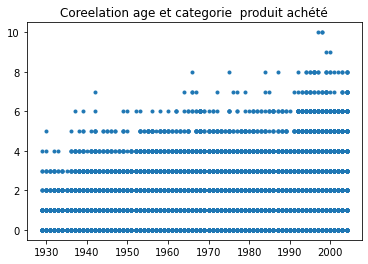

In [89]:
plt.plot(dfpanier["birth"]["mean"], dfpanier["categ"]["sum"] ,'.')
plt.title('Coreelation age et categorie  produit achété')
plt.show()